In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
dframe1=pd.read_csv(r'D:\hourly_44201_2015.csv',header=0)
dframe2=pd.read_csv(r'D:\AN142_2015.csv',skiprows=8,names=['Station_ID','Date_Time','pressure_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','precip_accum_set_1','dew_point_temperature_set_1d','wind_chill_set_1d','wind_cardinal_direction_set_1d','sea_level_pressure_set_1d','heat_index_set_1d','wet_bulb_temperature_set_1d','altimeter_set_1d'])
dframe3=pd.read_csv(r'D:\hourly_42401_2015.csv',header=0)
dframe4=pd.read_csv(r'D:\hourly_88101_2015.csv',header=0)


In [3]:
PM=dframe2[['Date_Time', 'pressure_set_1', 'air_temp_set_1','relative_humidity_set_1', 'wind_speed_set_1', 'wind_direction_set_1', 'dew_point_temperature_set_1d','wind_cardinal_direction_set_1d', 'sea_level_pressure_set_1d', 'altimeter_set_1d']]
HD = dframe1[['Latitude','Longitude','Date Local','Time Local','Sample Measurement']]
HD1 = dframe3[['Latitude','Longitude','Date Local','Time Local','Sample Measurement']]
HD2 = dframe4[['Latitude','Longitude','Date Local','Time Local','Sample Measurement']]


In [4]:
import csv
with open('D:\AN142_2015.csv') as csv_file:
    data = [row for row in csv.reader(csv_file)]
d1= (data[2][0]).split(" ")[2]
d2= (data[3][0]).split(" ")[2]
d1=float(d1)
d2=float(d2)
d3=(data[10][1]).split(" ")[2]


In [5]:
new = HD['Date Local'].str.split("-", n = 2, expand = True) 
HD['Date_Time'] = new[1].astype(str) + '/' +new[2].astype(str)+'/'+new[0].astype(str)  
HD['Date_Time'] = HD['Date_Time'].astype(str) + ' ' + HD['Time Local'].astype(str)+ ' '+d3
HD=HD.loc[(HD['Latitude']>=d1-1)  &  (HD['Latitude']<=(d1+1))  &  (HD['Longitude']>=d2-1)& (HD['Longitude']<=(d2+1))]

new1 = HD1['Date Local'].str.split("-", n = 2, expand = True) 
HD1['Date_Time'] = new1[1].astype(str) + '/' +new1[2].astype(str)+'/'+new1[0].astype(str)  
HD1['Date_Time'] = HD1['Date_Time'].astype(str) + ' ' + HD1['Time Local'].astype(str)+ ' '+d3
HD1=HD1.loc[(HD['Latitude']>=d1-1)  &  (HD1['Latitude']<=(d1+1))  &  (HD1['Longitude']>=d2-1) & (HD1['Longitude']<=(d2+1))]

new2 = HD2['Date Local'].str.split("-", n = 2, expand = True) 
HD2['Date_Time'] = new2[1].astype(str) + '/' +new2[2].astype(str)+'/'+new2[0].astype(str)  
HD2['Date_Time'] = HD2['Date_Time'].astype(str) + ' ' + HD2['Time Local'].astype(str)+ ' '+d3
HD2=HD2.loc[(HD2['Latitude']>=d1-1)  &  (HD2['Latitude']<=(d1+1))  &  (HD2['Longitude']>=d2-1) & (HD2['Longitude']<=(d2+1))]


C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [6]:
OD = pd.merge(PM,HD,on='Date_Time')
OD1=pd.merge(PM,HD1,on='Date_Time')
OD2=pd.merge(PM,HD2,on='Date_Time')


In [7]:
OD['dew_point_temperature_set_1d']=OD['dew_point_temperature_set_1d'].fillna((OD['dew_point_temperature_set_1d'].mean()))
OD['sea_level_pressure_set_1d']=OD['sea_level_pressure_set_1d'].fillna((OD['sea_level_pressure_set_1d'].mean()))

OD1['dew_point_temperature_set_1d']=OD1['dew_point_temperature_set_1d'].fillna((OD1['dew_point_temperature_set_1d'].mean()))
OD1['sea_level_pressure_set_1d']=OD1['sea_level_pressure_set_1d'].fillna((OD1['sea_level_pressure_set_1d'].mean()))

OD2['dew_point_temperature_set_1d']=OD2['dew_point_temperature_set_1d'].fillna((OD2['dew_point_temperature_set_1d'].mean()))
OD2['sea_level_pressure_set_1d']=OD2['sea_level_pressure_set_1d'].fillna((OD2['sea_level_pressure_set_1d'].mean()))


In [10]:
x = OD[['pressure_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','dew_point_temperature_set_1d']]
x1 = OD1[['pressure_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','dew_point_temperature_set_1d']]
x2 = OD2[['pressure_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','dew_point_temperature_set_1d']]


In [11]:
x['dew_point_temperature_set_1d']=x['dew_point_temperature_set_1d'].fillna((x['dew_point_temperature_set_1d'].mean()))
x['wind_direction_set_1']=x['wind_direction_set_1'].fillna((x['wind_direction_set_1'].mean()))
x['wind_speed_set_1']=x['wind_speed_set_1'].fillna((x['wind_speed_set_1'].mean()))
x['relative_humidity_set_1']=x['relative_humidity_set_1'].fillna((x['relative_humidity_set_1'].mean()))
x['air_temp_set_1']=x['air_temp_set_1'].fillna((x['air_temp_set_1'].mean()))
x['pressure_set_1']=x['pressure_set_1'].fillna((x['pressure_set_1'].mean()))



C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [29]:
x1['dew_point_temperature_set_1d']=x1['dew_point_temperature_set_1d'].fillna((x1['dew_point_temperature_set_1d'].mean()))
x1['wind_direction_set_1']=x1['wind_direction_set_1'].fillna((x1['wind_direction_set_1'].mean()))
x1['wind_speed_set_1']=x1['wind_speed_set_1'].fillna((x1['wind_speed_set_1'].mean()))
x1['relative_humidity_set_1']=x1['relative_humidity_set_1'].fillna((x1['relative_humidity_set_1'].mean()))
x1['air_temp_set_1']=x1['air_temp_set_1'].fillna((x1['air_temp_set_1'].mean()))
x1['pressure_set_1']=x1['pressure_set_1'].fillna((x1['pressure_set_1'].mean()))


In [13]:
x2['dew_point_temperature_set_1d']=x2['dew_point_temperature_set_1d'].fillna((x2['dew_point_temperature_set_1d'].mean()))
x2['wind_direction_set_1']=x2['wind_direction_set_1'].fillna((x2['wind_direction_set_1'].mean()))
x2['wind_speed_set_1']=x2['wind_speed_set_1'].fillna((x2['wind_speed_set_1'].mean()))
x2['relative_humidity_set_1']=x2['relative_humidity_set_1'].fillna((x2['relative_humidity_set_1'].mean()))
x2['air_temp_set_1']=x2['air_temp_set_1'].fillna((x2['air_temp_set_1'].mean()))
x2['pressure_set_1']=x2['pressure_set_1'].fillna((x2['pressure_set_1'].mean()))


C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [14]:
y= OD['Sample Measurement'] 
y1= OD1['Sample Measurement'] 
y2= OD2['Sample Measurement'] 



In [45]:
x_matrix = x.to_numpy()
x.as_array()

AttributeError: 'DataFrame' object has no attribute 'as_array'

In [15]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient']) 
y_pred = regressor.predict(X_test)
new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



Given below is the comparison between estimated and actual concentration level for OZONE


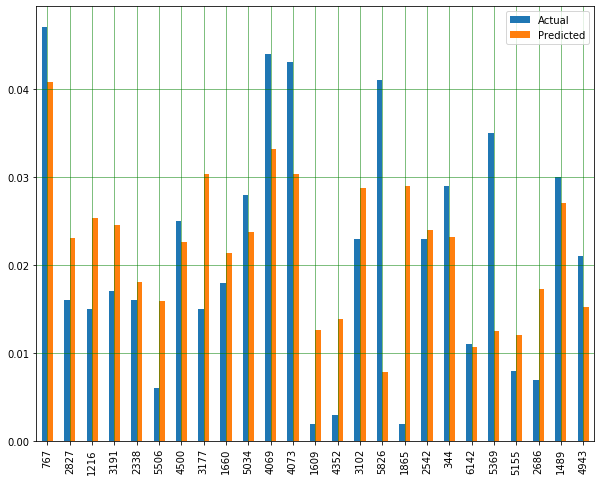

In [23]:
new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result=new.head(25)
print('Given below is the comparison between estimated and actual concentration level for OZONE')
result
result.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)
regressor1 = LinearRegression()  
regressor1.fit(X_train1, y_train1)
#coeff_df = pd.DataFrame(regressor1.coef_, x1.columns, columns=['Coefficient']) 
y1_pred = regressor1.predict(X_test1)
new1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y1_pred})

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [27]:
result

,Actual,Predicted
767,0.047,0.040814
2827,0.016,0.023031
1216,0.015,0.025381
3191,0.017,0.024530
2338,0.016,0.018055
5506,0.006,0.015891
4500,0.025,0.022570
3177,0.015,0.030324
1660,0.018,0.021390
5034,0.028,0.023743


In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)
regressor2 = LinearRegression()  
regressor2.fit(X_train2, y_train2)
#coeff_df = pd.DataFrame(regressor2.coef_, x2.columns, columns=['Coefficient']) 
y2_pred = regressor2.predict(X_test2)
new2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y2_pred})

Given below is the comparison between estimated and actual concentration level for PM2.5


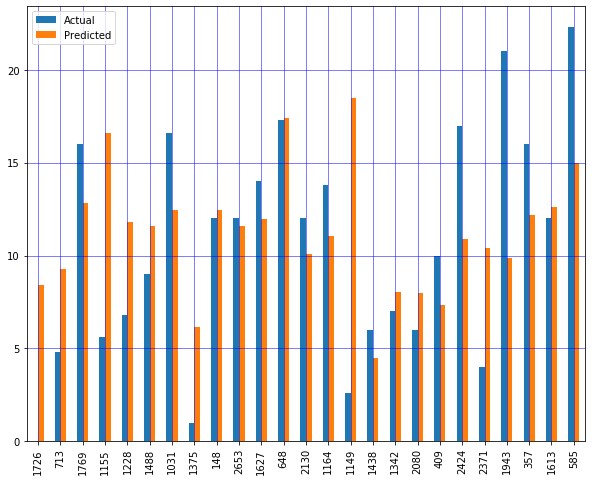

In [35]:
new2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y2_pred})
result2=new2.head(25)
print('Given below is the comparison between estimated and actual concentration level for PM2.5')
result2
result2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()


In [46]:
metrics.mean_absolute_error(y_test,y_pred)

0.0092648584554706

In [49]:
metrics.mean_squared_error(y_test,y_pred)

0.0001232272697004864

In [50]:
metrics.root_mean_squared_error(y_test,y_pred)

AttributeError: module 'sklearn.metrics' has no attribute 'root_mean_squared_error'